In [106]:
import arcgis
from arcgis.gis import GIS
from arcgis.gis import ContentManager
from arcgis.mapping import WebMap
import arcpy
import os, sys

print(arcgis.__version__)

gis_source = GIS("Pro")
print(gis_source)

gis_target = GIS(profile="City of Greenfield Online")
print(gis_target)

category_path_prefix = "/Categories/AssetAlly/Utilities/"
utility_type = "Sanitary"
utility_category = category_path_prefix + utility_type
base_feature_service_name = utility_type + " Utilities"

2.2.0.1
GIS @ https://r-m.maps.arcgis.com/ version:2024.1
GIS @ https://GreenfieldGIS.maps.arcgis.com version:2024.1


<Item title:"AssetAlly Demo Sanitary Utilities Web Map" type:Web Map owner:astjohn_RM>
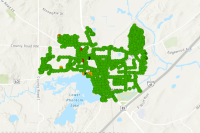

In [109]:
# Get the AssetAlly Demo Web Map template

wm_item_id = "138be457bbe047cb85332f74699c4672"
#wm_item_id = "9ca6e09d4aea49beac27c1839470e5e5"
wm_item = gis_source.content.get(wm_item_id)
wm_item

In [28]:
# Clone the Web Map to the same org

gis_source.content.clone_items(items=[wm_item], # list of items to clone
            folder="AssetAlly Sanitary", # target folder
            item_extent=None, # do I need to calculate extent for here?
            use_org_basemap=False, # basemap does not change
            copy_data=False, # do not copy HFL to target Portal 
            copy_global_ids=False, # features not copied, so does not matter
            search_existing_items=True, # check whether item already exists in target
            item_mapping={
                "37f5de0356854172aee505a7ee015db9":"9c08e24a9bb54d6f93159912fabc08f3", # hfl
                "b1ba6ba71a374d68b59ef85123b884c6":"e21ba1c1f1ff424697dd4c405b40d24c"  # view
            }, # {source itemid: target itemid} 
            group_mapping=None, # key=source groupid; value=target groupid; 
                                #want to leave AssetAlly Content group alone in some cases and want to update to client Content group in some cases
            owner="astjohn_RM", # set to target R&M admin user? can we leave as internal R&M user?
            preserve_item_id=False)

[<Item title:"AssetAlly Demo Sanitary Utililties Web Map" type:Web Map owner:jtamblynGF>]

In [110]:
# Clone the Web Map to the target org
# Note: HFLs do not have to have the same name to be mapped by the item_mapping parameter
# BUG: Views do not work here
# BUG: Sometimes, the copy_data parameter is ignored and the HFL is copied to the target org
# BUG: The Abandoned utility layers have been missed by the item_mapping procedure

gis_target.content.clone_items(items=[wm_item], # list of items to clone
            folder="AssetAlly", # target folder
            item_extent=None, # do I need to calculate extent for here?
            use_org_basemap=False, # basemap does not change
            copy_data=False, # do not copy HFL to target Portal 
            copy_global_ids=False, # features not copied, so does not matter
            search_existing_items=True, # check whether item already exists in target
            item_mapping={
                "37f5de0356854172aee505a7ee015db9":"9c08e24a9bb54d6f93159912fabc08f3",  # hfl
                "b1ba6ba71a374d68b59ef85123b884c6":"c760520e03da41feb8cb215a4d00d557"  # view
            }, # {source itemid: target itemid} 
            group_mapping={
                "24084c1a33854df7946ea639d1c60855":"daaa9e7d4ebb4b93a209535fa7662a3c"
            }, # key=source groupid; value=target groupid; 
                #want to leave AssetAlly Content group alone in some cases and want to update to client Content group in some cases
            owner="jtamblynGF", # set to target R&M admin user? can we leave as internal R&M user?
            preserve_item_id=False)

[<Item title:"AssetAlly Demo Sanitary Utilities Web Map" type:Web Map owner:jtamblynGF>]

In [93]:
# Check that the Web Map exists in the target org

wm_item = gis_target.content.search(query=rf'title:"AssetAlly Demo Sanitary Utilities Web Map", type:"Web Map"')
wm_item

[<Item title:"AssetAlly Demo Sanitary Utililties Web Map" type:Web Map owner:jtamblynGF>]

In [ ]:
# Update new Web Map initial extent, thumbnail, view layer data sources, sharing 